This is a test for linear regression, especially for the numeric variables.

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
df = pd.read_csv('datasets/ObesityDataSet_raw_and_data_sinthetic.csv')
df_eating_numeric = pd.read_csv('datasets/int64_eating_habits_data.csv')

In [4]:
print(df.dtypes)
print(df_eating_numeric.dtypes)

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object
FCVC    float64
NCP     float64
CH2O    float64
dtype: object


In [6]:
df_numeric = df_eating_numeric.join(df[['Height', 'Age', 'Weight']])

In [8]:
df_numeric.describe()

,FCVC,NCP,CH2O,Height,Age,Weight
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,2.419043,2.685628,2.008011,1.701677,24.312600,86.586058
std,0.533927,0.778039,0.612953,0.093305,6.345968,26.191172
min,1.000000,1.000000,1.000000,1.450000,14.000000,39.000000
25%,2.000000,2.658738,1.584812,1.630000,19.947192,65.473343
50%,2.385502,3.000000,2.000000,1.700499,22.777890,83.000000
75%,3.000000,3.000000,2.477420,1.768464,26.000000,107.430682
max,3.000000,4.000000,3.000000,1.980000,61.000000,173.000000


FCVC: Frequency of consumption of vegetables <br>
NCP: Number of main meals<br>
CH20: Consumption of water daily<br>

<AxesSubplot:>

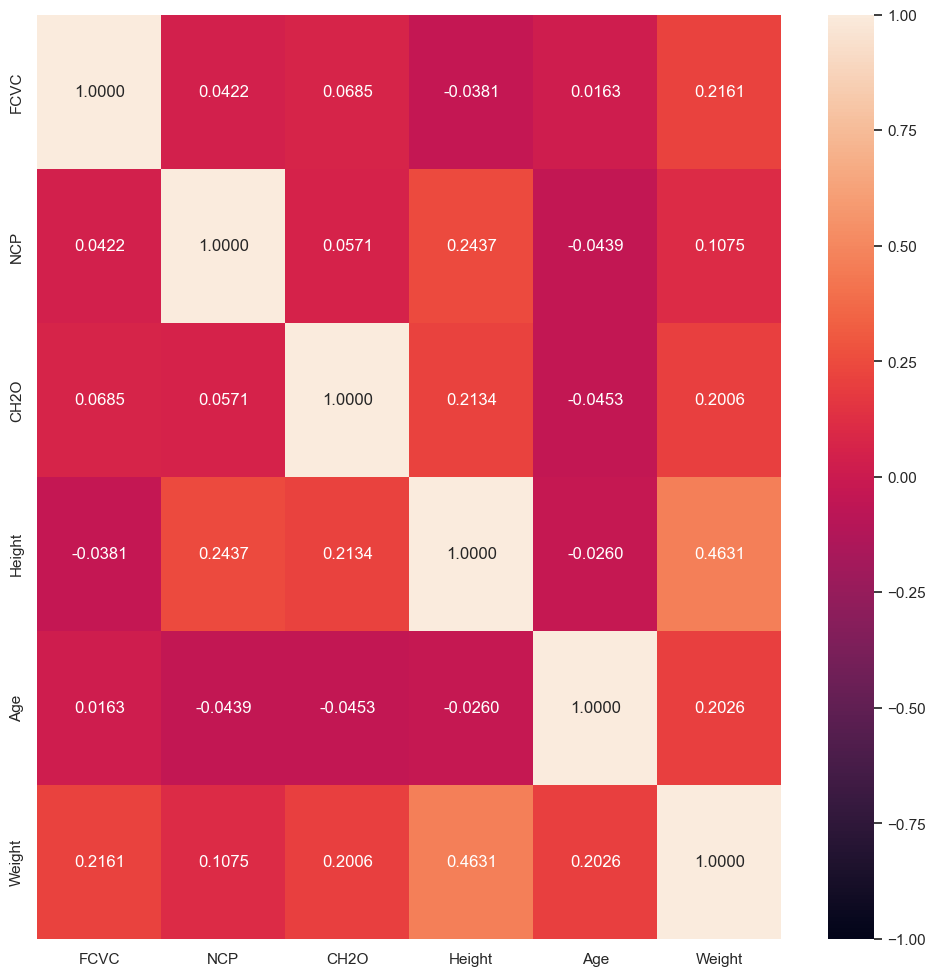

In [9]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(df_numeric.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".4f")

In [10]:
corr = df_numeric.corr()
print(corr['Weight'])

FCVC      0.216125
NCP       0.107469
CH2O      0.200575
Height    0.463136
Age       0.202560
Weight    1.000000
Name: Weight, dtype: float64


In [12]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

response = df_numeric['Weight']   # Response
predictor = df_numeric.drop('Weight', axis=1)  # Predictor

# Split the Dataset into Train and Test in an 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(predictor, response, test_size = 0.2)

In [15]:

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)

feature_names = X.columns
model_coefficients = linreg.coef_

coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coefficient value'])
print(coefficients_df)

Intercept of Regression 	: b =  -190.58430076028725
        Coefficient value
FCVC            11.037083
NCP             -0.190162
CH2O             4.077200
Height         129.870705
Age              0.896505


In [16]:
y_pred = linreg.predict(X_test)

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

          Actual   Predicted
1886  111.914361   91.204470
3      87.000000  108.083776
27     52.000000   67.296368
564    59.682591   94.186529
474    64.000000   83.200035
...          ...         ...
710    49.982970   65.136427
1755  121.284533  107.422400
911    68.058902   66.202463
538    41.890204   60.238218
952    55.822119   46.085789

[423 rows x 2 columns]


In [18]:
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_pred)))
print()


Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.29969168634454435
Mean Squared Error (MSE) 	: 475.2812428988255
Root Mean Squared Error (RMSE) 	: 21.800945917524437



<AxesSubplot:xlabel='Weight'>

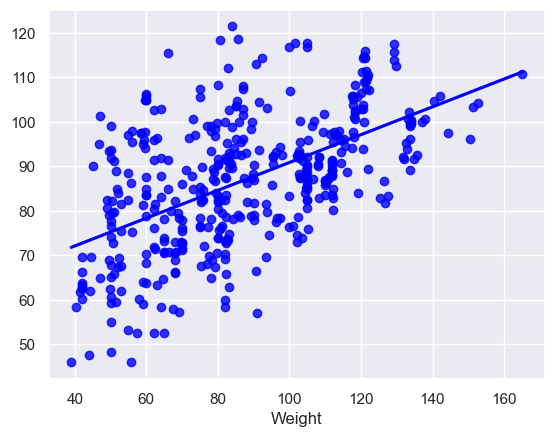

In [20]:
sb.regplot(x=y_test,y=y_pred,ci=None,color ='blue')